In [37]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [40]:
df = pd.read_csv(path_to_csv + "/AAPL.csv")
df1 = df.reset_index()['Close']

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [42]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [43]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [44]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [45]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [46]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 2s 33ms/step - loss: 0.0362 - val_loss: 0.0043
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0019 - val_loss: 0.0084
Epoch 3/100
15/15 [==============================] - 0s 15ms/step - loss: 9.4937e-04 - val_loss: 0.0033
Epoch 4/100
15/15 [==============================] - 0s 16ms/step - loss: 7.6297e-04 - val_loss: 0.0031
Epoch 5/100
15/15 [==============================] - 0s 15ms/step - loss: 6.7385e-04 - val_loss: 0.0029
Epoch 6/100
15/15 [==============================] - 0s 16ms/step - loss: 6.5914e-04 - val_loss: 0.0031
Epoch 7/100
15/15 [==============================] - 0s 15ms/step - loss: 5.9582e-04 - val_loss: 0.0038
Epoch 8/100
15/15 [==============================] - 0s 15ms/step - loss: 6.2885e-04 - val_loss: 0.0023
Epoch 9/100
15/15 [==============================] - 0s 16ms/step - loss: 6.7145e-04 - val_loss: 0.0038
Epoch 10/100
15/15 [==============================] - 0s 16ms/step - los

In [48]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 6ms/step


In [49]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))
yval = scaler.inverse_transform(yval.reshape(-1, 1))

In [50]:
test_rmse = np.sqrt(np.mean((scaler.inverse_transform(y_pred) - ytest)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 4.426381453575556


In [51]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(scaler.inverse_transform(y_pred) , ytest)
print("Testing MAE: {}".format(test_mae))

Testing MAE: 3.498836584960937


In [52]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(ytest, scaler.inverse_transform(y_pred))
print("Testing MAPE: ", test_mape)

Testing MAPE:  0.02248448012073793


In [53]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[7:].reshape(1, -1)
x_input_shape = x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.68046435 0.68087399 0.69862592 0.72074766 0.73044296 0.72586843
 0.74020661 0.75365706 0.73365198 0.74245965 0.75024321 0.78704454
 0.81217038 0.79325766 0.81319449 0.79455493 0.78738584 0.78834172
 0.80773242 0.80329436 0.81783737 0.80677655 0.79885641 0.77106768
 0.77400364 0.77734913 0.75898275 0.76724419 0.76376211 0.74942392
 0.75352058 0.7884783  0.80759584 0.79237013 0.80104121 0.7854741
 0.77120426 0.78465481 0.79912947 0.8018606  0.8213878  0.81558422
 0.83197063 0.84480671 0.83490659 0.84241698 0.85142957 0.83797903
 0.83367755 0.85498    0.865836   0.88317828 0.89184947 0.88816256
 0.87539472 0.8815397  0.86358285 0.85518482 0.85040546 0.88768458
 0.88529495 0.88543143 0.89389779 0.90181794 0.89512673 0.88399767
 0.88611424 0.87546306 0.87539472 0.90714352 0.91581461 0.91520014
 0.90803105 0.9005889  0.88925491 0.94237441 0.94189642 0.93008455
 0.94230607 0.94360334 0.93554672 0.93213288 0.93213288 0.93636601
 0.95247936 0.95323041 0.94667578 0.9286507  0.9305

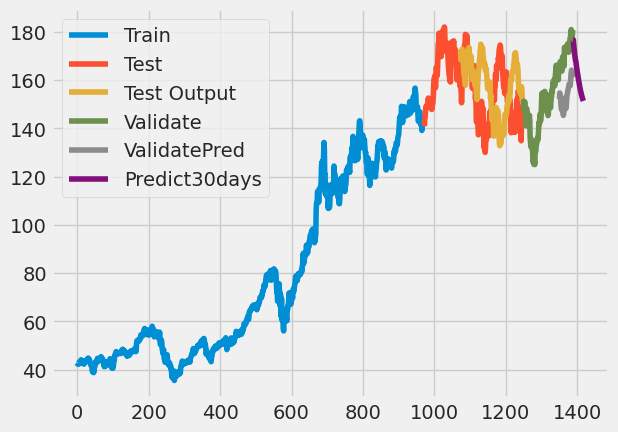

In [54]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(y_pred[:len(test_data_index)]))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(y_pred_val[:len(val_data_index)]))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Test Output','Validate','ValidatePred','Predict30days'])
plt.show()